In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Initial data exploration 

This notebook is used to perform an initial exploration of the data to be worked on, frequent explorations are performed to decide on the preprocessing of the data for the machine learning modeling pipeline. 

## Source

Section to describe the source used to obtain the data.

This exercise is based on data available in Kaggle:

[House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)

## Data  

In [2]:
data_path="/home/juanpalms/Desktop/MCD/arquitectura_datos/Tareas/tarea3/House_prices_refactoring/data/raw"
#data_path="../data/raw"

In [3]:
train=pd.read_csv(data_path+"/train.csv")

## Basic Understanding

In [4]:
print(f"The data set contains:{train.shape[1]} columns and {train.shape[0]} observations")

The data set contains:81 columns and 1460 observations


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Column types and initial feature selection

In [6]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

<br> Based on the business understanding, perform an initial selection of variables to make the models parsimonious and to integrate only useful variables into the preprocessing pipeline. <br> Select and store the variables that are useful for the analysis in three different lists: 1) target variables, 2) numerical (ordinal) variables and 3) categorical variables

#### Target variable

In [7]:
y="SalePrice"

#### Input variables

In [16]:
### Variables numericas (ordinales)
numeros=["LotFrontage","LotArea","OverallQual","OverallCond","YearBuilt","YearRemodAdd",
           "MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
          "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","BsmtHalfBath","FullBath",
          "HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces","GarageYrBlt",
          "GarageCars","GarageArea","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch",
           "ScreenPorch","PoolArea","MiscVal","YrSold","MoSold"]
## Ordinales/
ordinales=["BsmtQual","BsmtCond","ExterCond","ExterQual","KitchenQual"]

### Variables categoricas
nominales=["MSSubClass","MSZoning","Street","Alley","LandContour","Utilities",
            "LotConfig","Neighborhood","Condition1","Condition2","BldgType",
            "HouseStyle","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType",
            "Foundation","Heating","Electrical","GarageType","MiscFeature","SaleType","SaleCondition","LotShape","LandSlope","ExterQual"]
### Variables para tirar
to_drop=["id","ILotShape","LandSlope","ExterQual","BsmtFinType1","BsmtFinType2","HeatingQC",
           "CentralAir","KitchenQual","Functional","FireplaceQu","GarageFinish","GarageQual",
           "GarageCond","PavedDrive","PoolQC","Fence"]

### Visualize presence of some outliers

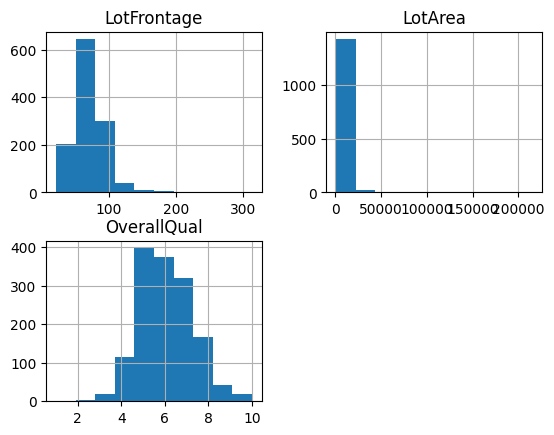

In [87]:
train.hist(column=["LotFrontage","LotArea","OverallQual"]);